In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import patches
%matplotlib inline

In [2]:
wine = pd.read_csv('WineQT.csv')
wine.drop(["Id"],axis=1, inplace=True) # 필요없는 'Id' column 제거
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- fixed acidity	: 산도
- volatile acidity : 휘발성산
- citric acid : 시트르산
- residual sugar : 잔당 ; 발효 후 와인 속에 남아있는 당분
- chlorides : 염화물
- free sulfur dioxide : 독립 이산화황
- total sulfur dioxide : 총 이산화황
- density
- pH : 수소이온농도
- sulphates : 황산염
- alcohol : 도수
- quality : 와인의 품질 : 0~10

In [3]:
wine.shape

(1143, 12)

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.quality.describe()

count    1143.000000
mean        5.657043
std         0.805824
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [6]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8]

In [7]:
wine['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

# quality 분포도

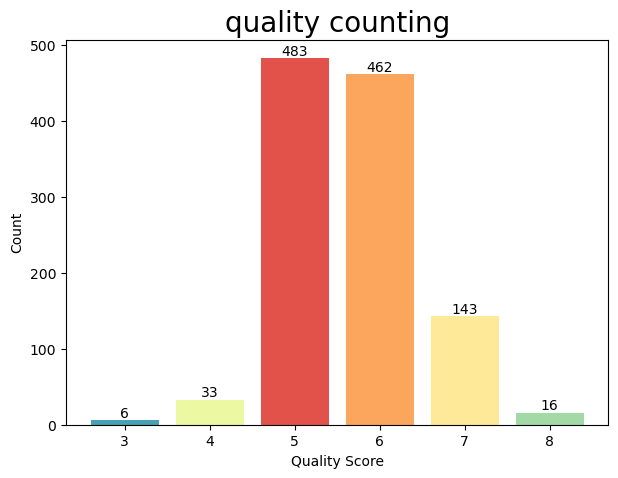

In [11]:
counted_values = wine['quality'].value_counts()
x=counted_values.index.tolist()
y=counted_values.values.tolist()

plt.figure(figsize=(7,5))
plt.title('quality counting', fontsize=20)

colors = sns.color_palette("Spectral")
plt.bar(x,y, color=colors)

plt.xlabel("Quality Score")
plt.ylabel("Count")

for i, v in enumerate(x):
    plt.text(v, y[i], y[i], fontsize = 10, color='black', horizontalalignment='center', verticalalignment='bottom')   
    
plt.savefig("quality counting.jpg")
plt.show()

# 상관계수

독립 = 상관x = 0에 가까움

In [12]:
wine_corr = wine.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


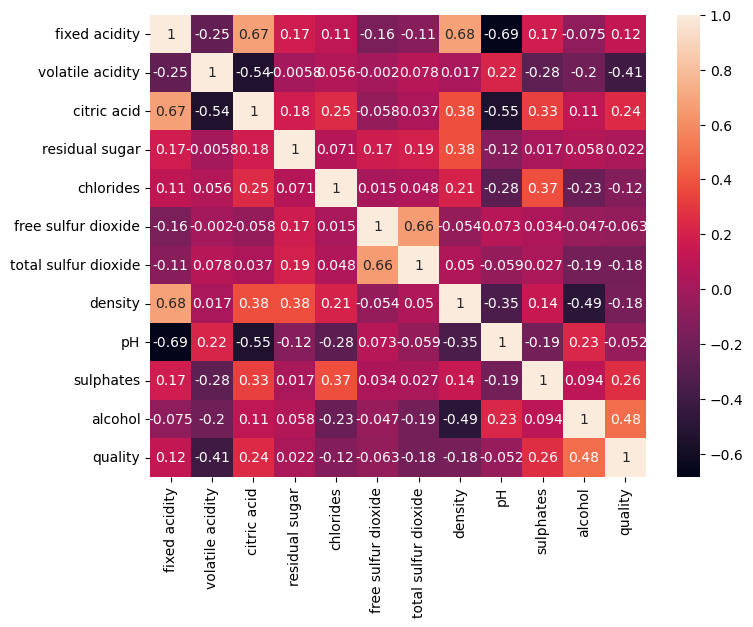

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(wine.corr(), annot=True)
plt.savefig("heatmap.jpg",bbox_inches='tight')

In [14]:
# 양의 상관관계

wine_corr.loc[wine_corr['quality']>0, 'quality']

fixed acidity     0.121970
citric acid       0.240821
residual sugar    0.022002
sulphates         0.257710
alcohol           0.484866
quality           1.000000
Name: quality, dtype: float64

In [15]:
# 음의 상관관계

wine_corr.loc[wine_corr['quality']<0, 'quality']

volatile acidity       -0.407394
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
Name: quality, dtype: float64

--------------------------------------------------------------

In [16]:
df = pd.read_excel('final_metrics.xlsx', sheet_name='accuracy').T

header = df.iloc[0]
df = df[1:]
 
df.rename(columns=header, inplace=True)
df

ValueError: Worksheet named 'accuracy' not found

<Figure size 700x500 with 0 Axes>

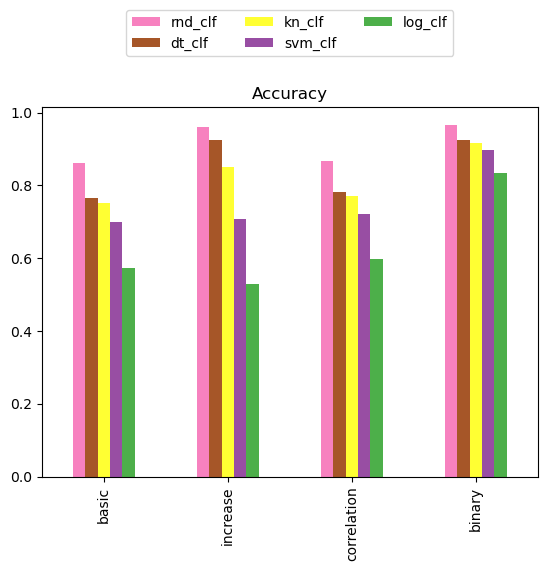

In [13]:
plt.figure(figsize=(7,5))

colors = sns.color_palette('Set1_r')
df.plot.bar(color=colors)
plt.title("Accuracy")
plt.ylabel("")
plt.legend(loc='center',bbox_to_anchor=(0.5,1.2),ncol=3)

<Figure size 700x500 with 0 Axes>

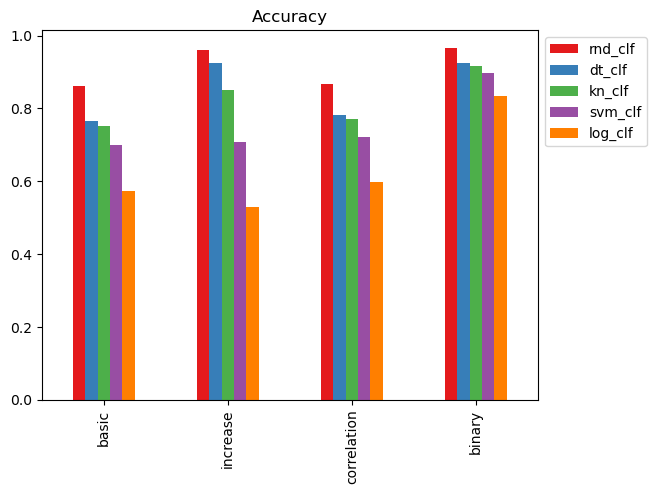

In [14]:
plt.figure(figsize=(7,5))

colors = sns.color_palette('Set1')
df.plot.bar(color=colors)
plt.title("Accuracy")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1,1))

<Figure size 700x500 with 0 Axes>

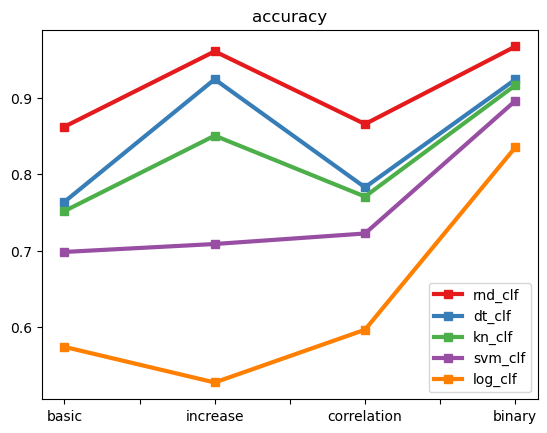

<Figure size 700x500 with 0 Axes>

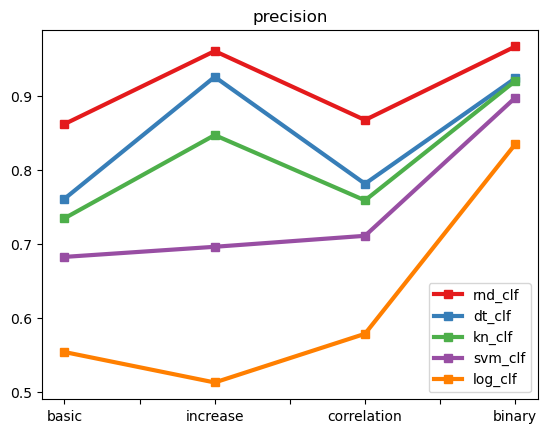

<Figure size 700x500 with 0 Axes>

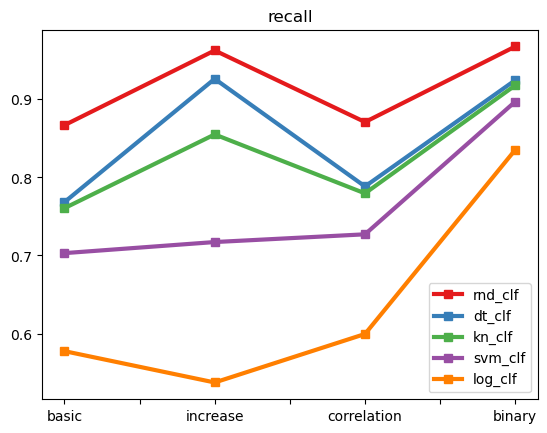

<Figure size 700x500 with 0 Axes>

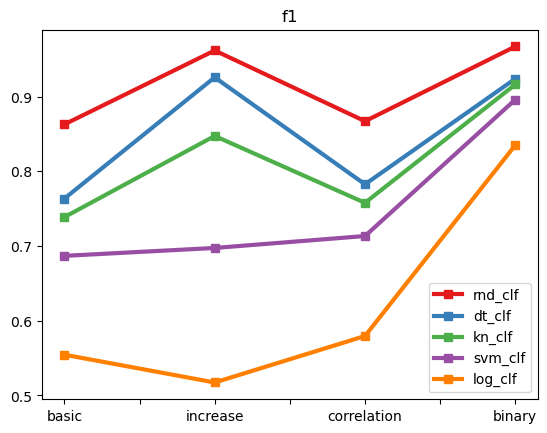

In [10]:
sheets=['accuracy','precision','recall','f1']
for sheet in sheets:
    df = pd.read_excel('metrics.xlsx', sheet_name=sheet).T
    header = df.iloc[0]
    df = df[1:]
 
    df.rename(columns=header, inplace=True)
    
    
    plt.figure(figsize=(7,5))

    colors = sns.color_palette("Set1")
    df.plot(marker='s', linewidth=3, color=colors)
    plt.title(sheet)
    plt.ylabel("")


In [ ]:
df = pd.read_excel('metrics.xlsx', sheet_name='accuracy').T

header = df.iloc[0]
df = df[1:]
 
df.rename(columns=header, inplace=True)
df

plt.figure(figsize=(7,5))

colors = sns.color_palette('Set1')
df.plot(marker='o',color=colors)
plt.title("Accuracy")
plt.ylabel("")


# 모색방안별 성능지표 결과

<Figure size 800x600 with 0 Axes>

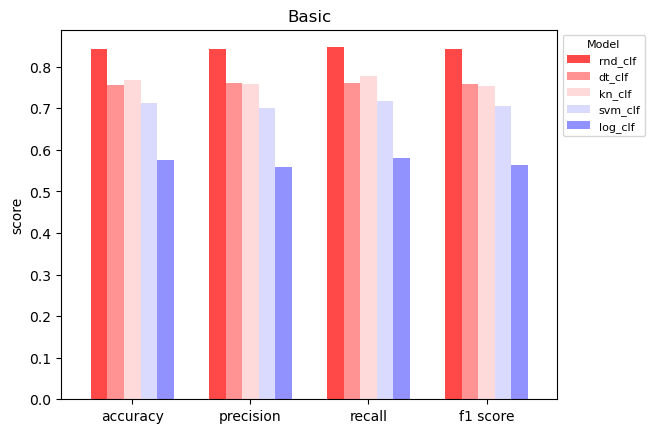

In [32]:
df = pd.read_excel('final_metrics.xlsx', sheet_name='basic').T
#df.set_index('model',inplace=True)
header = df.iloc[0]
df = df[1:]
 
df.rename(columns=header, inplace=True)
plt.figure(figsize=(8,6))

colors = sns.color_palette('bwr_r')
df.plot.bar(color=colors, width=0.7)

plt.title("Basic")
plt.xticks(rotation=0)
plt.ylabel("")
plt.ylabel("score")
plt.legend(title='Model',title_fontsize = 8, bbox_to_anchor=(1,1),ncol=1,fontsize=8)

plt.show()

<Figure size 800x600 with 0 Axes>

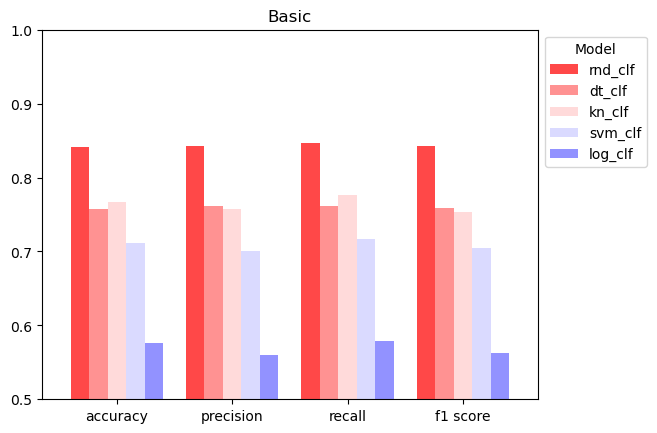

<Figure size 800x600 with 0 Axes>

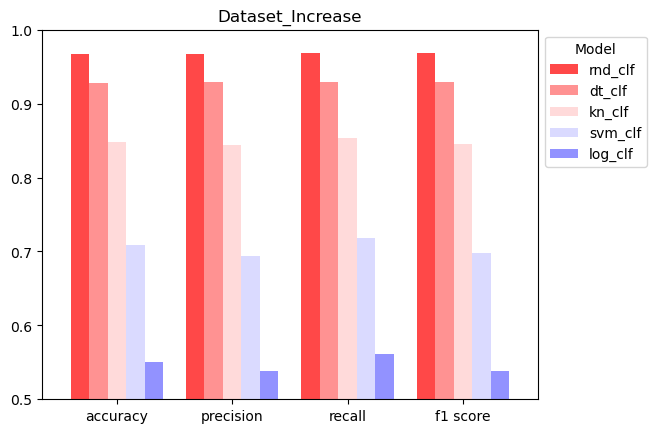

<Figure size 800x600 with 0 Axes>

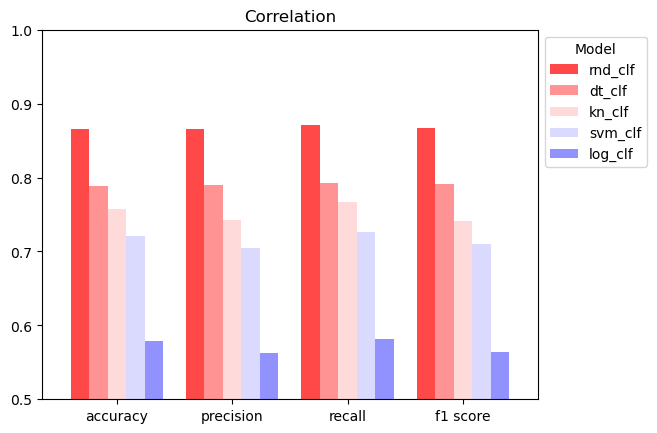

<Figure size 800x600 with 0 Axes>

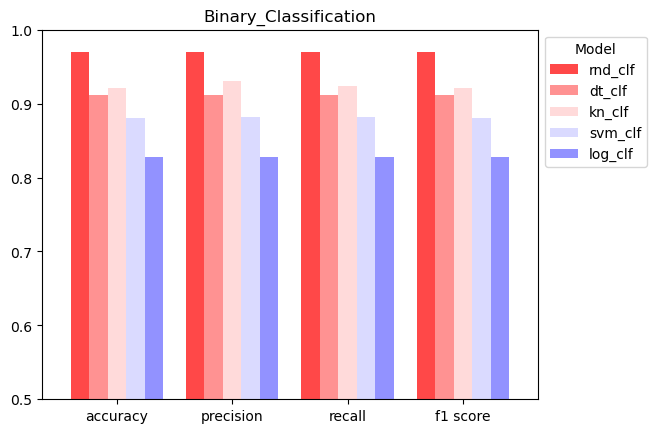

In [35]:
sheet=['basic','increase','correlation','binary']
title=['Basic','Dataset_Increase','Correlation','Binary_Classification']

for i in range(len(sheet)):
    df = pd.read_excel('final_metrics.xlsx', sheet_name=sheet[i]).T
    #df.set_index('model',inplace=True)
    header = df.iloc[0]
    df = df[1:]

    df.rename(columns=header, inplace=True)
    plt.figure(figsize=(8,6))

    colors = sns.color_palette('bwr_r')
    df.plot.bar(color=colors, width=0.8)

    plt.title(title[i])
    plt.xticks(rotation=0)
    plt.ylim(0.5,1)
    plt.legend(title='Model',bbox_to_anchor=(1,1),ncol=1)
    plt.savefig("./images/{}50.jpg".format(title[i]),bbox_inches='tight',dpi=100)
    plt.show()

# 성능지표별 

<Figure size 800x600 with 0 Axes>

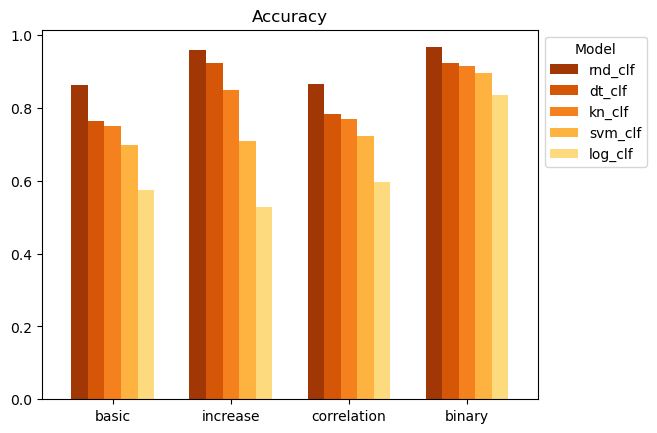

In [73]:
df = pd.read_excel('metrics.xlsx', sheet_name='accuracy').T
df.set_index('model',inplace=True)
header = df.iloc[0]
df = df[1:]
 
df.rename(columns=header, inplace=True)
plt.figure(figsize=(8,6))

colors = sns.color_palette('YlOrBr_r')
df.plot.bar(color=colors, width=0.7)

plt.title("Accuracy")
plt.xticks(rotation=0)
plt.ylabel("")
plt.legend(title='Model', bbox_to_anchor=(1,1),ncol=1)

plt.show()

In [ ]:
df.columns

# 최종 결과치

<Figure size 800x600 with 0 Axes>

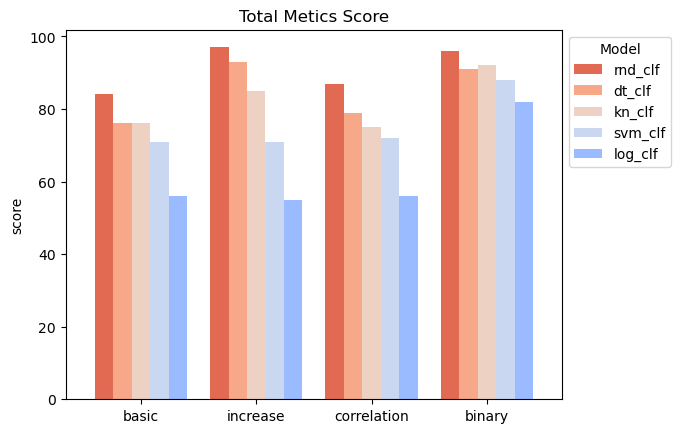

In [40]:
df = pd.read_excel('final_metrics.xlsx', sheet_name='total').T

header = df.iloc[0]
df = df[1:]
 
df.rename(columns=header, inplace=True)
plt.figure(figsize=(8,6))

colors = sns.color_palette('coolwarm_r')
df.plot.bar(color=colors, width=0.8)

plt.title("Total Metics Score")
plt.xticks(rotation=0)
plt.ylabel("score")
#plt.ylim(50,100)
plt.legend(title='Model', bbox_to_anchor=(1,1),ncol=1)
plt.savefig("./images/Total Metices Score.jpg" ,bbox_inches='tight',dpi=100)
plt.show()

In [45]:
df

,model,basic,increase,correlation,binary
0,rnd_clf,84,97,87,96
1,dt_clf,76,93,79,91
2,kn_clf,76,85,75,92
3,svm_clf,71,71,72,88
4,log_clf,56,55,56,82


In [44]:
df = pd.read_excel('final_metrics.xlsx', sheet_name='total')
df.set_index('model',inplace=True)

# header = df.iloc[0]
# df = df[1:]
 
# df.rename(columns=header, inplace=True)
plt.figure(figsize=(8,6))

colors = sns.color_palette('coolwarm_r')
df.plot.bar(color=colors, width=0.8)

plt.title("Total Metics Score")
plt.xticks(rotation=0)
#plt.ylim(50,100)
plt.ylabel("score")
plt.legend(title='Method', bbox_to_anchor=(1,1),ncol=1)
plt.savefig("./images/Total Metices Score_Model.jpg" ,bbox_inches='tight',dpi=100)
plt.show()

<Figure size 800x600 with 0 Axes>

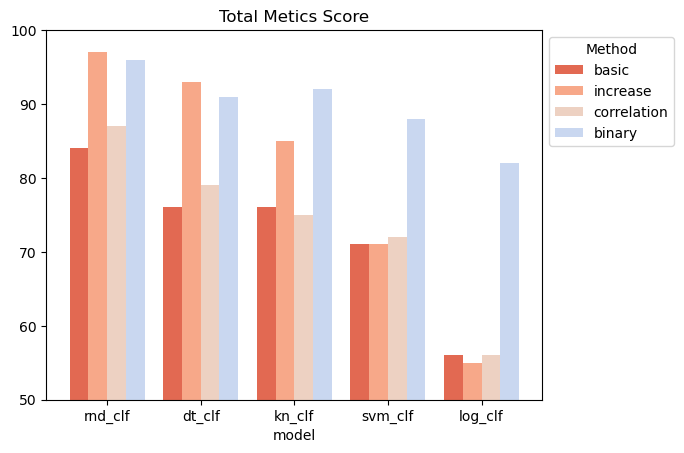

In [26]:
df = pd.read_excel('final_metrics.xlsx', sheet_name='total')
df.set_index('model',inplace=True)

# header = df.iloc[0]
# df = df[1:]
 
# df.rename(columns=header, inplace=True)
plt.figure(figsize=(8,6))

colors = sns.color_palette('coolwarm_r')
df.plot.bar(color=colors, width=0.8)

plt.title("Total Metics Score")
plt.xticks(rotation=0)
plt.ylim(50,100)
plt.legend(title='Method', bbox_to_anchor=(1,1),ncol=1)
plt.savefig("./images/Total Metices Score_Model50.jpg" ,bbox_inches='tight',dpi=100)
plt.show()

# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
df = pd.read_excel('metrics.xlsx', sheet_name='accuracy')
df.set_index('model',inplace=True)

In [ ]:
df.iloc[0].plot.bar()

In [ ]:
sheets=['accuracy','precision','recall','f1']
models=['RandomForest', 'DecisionTree', 'KNeighbors', 'SVC', 'LogisticRegression']
title=['Basic','Dataset_Increase','Correlation','Binary_Classification']

for i in range(4):
    df = pd.read_excel('metrics.xlsx', sheet_name=sheets[i])
    df.set_index('model',inplace=True)
    
    df.iloc[i].plot.bar()
    #plt.title(models[i])
    plt.ylim(0.5,1.0)

In [ ]:
df.iloc[0]

In [ ]:
df.iloc[0].plot.bar()
plt.ylim(0.6,1.0)
#plt.yticks([0.8,1.0])
